# Screened Feasibility UQ

Take the generic DEMO solution, turned into an input file. Remove f-values at iteration vars, and replace their equality constraints with inequalities. Run PROCESS once-through with uncertain inputs, and the QoI as the value of constraints, i.e. the feasibility.

Here, the inputs have already been screened using the single-parameter evaluation method to find the most sensitive inputs.

In [1]:
import easyvvuq as uq
import chaospy as cp
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Campaign to capture feasibility

Using the epistemic uncertain inputs for the entire code, capture the distribution of constraint residuals.

To start with, make just 2 inputs uncertain (for running locally).

In [2]:
# Define campaign
WORK_DIR = "campaigns"
Path("campaigns").mkdir(exist_ok=True)
campaign = uq.Campaign(name="model_inputs", work_dir=WORK_DIR)

# Define parameter space
# Uncertainties from Alex's SA paper

params = {
    "fdene": {
        "type": "float",
        "min": 1.1,
        "max": 1.3,
        "default": 1.2,
    },  # check: not sure if this is right var. I think ok
    "hfact": {"type": "float", "min": 1.0, "max": 1.2, "default": 1.2},
    "coreradius": {"type": "float", "min": 0.45, "max": 0.75, "default": 0.75},  # ok
    "fimp_2": {"type": "float", "min": 0.085, "max": 0.115, "default": 0.1},  # ok
    "fimp_14": {
        "type": "float",
        "min": 1.0e-5,
        "max": 1.0e-4,
        "default": 1.0e-5,
    },  # ok
    "psepbqarmax": {"type": "float", "min": 8.7, "max": 9.7, "default": 9.0}, # ok
    "flhthresh": {"type": "float", "min": 0.85, "max": 1.15, "default": 1.15},  # ok
    "cboot": {
        "type": "float",
        "min": 0.95,
        "max": 1.05,
        "default": 1.0,
    },  # ok
    "peakfactrad": {"type": "float", "min": 2.0, "max": 3.5, "default": 3.33}, # ok
    "kappa": {"type": "float", "min": 1.8, "max": 1.9, "default": 1.848},  # ok
    "etaech": {"type": "float", "min": 0.3, "max": 0.5, "default": 0.4}, # ok
    "feffcd": {"type": "float", "min": 0.5, "max": 5.0, "default": 1.0}, # ok
    "etath": {"type": "float", "min": 0.36, "max": 0.4, "default": 0.375}, # ok
    "etaiso": {"type": "float", "min": 0.75, "max": 0.95, "default": 0.9}, # ok
    "boundl_18": {
        "type": "float",
        "min": 3.25,
        "max": 3.75,
        "default": 3.25,
    },  # q^95_min, ok
    "pinjalw": {"type": "float", "min": 51.0, "max": 61.0, "default": 61.0}, # ok
    "alstroh": {"type": "float", "min": 6.0e8, "max": 7.2e8, "default": 6.6e8}, # ok
    "sig_tf_wp_max": {
        "type": "float",
        "min": 5.2e8,
        "max": 6.4e8,
        "default": 6.4e8,
    },  # ok, but might need sig_tf_case_max to be the same too
    "aspect": {"type": "float", "min": 3.0, "max": 3.2, "default": 3.1},
    "boundu_2": {
        "type": "float",
        "min": 11.0,
        "max": 12.0,
        "default": 12.0,
    },  # B_T^max, ok
    "triang": {"type": "float", "min": 0.4, "max": 0.6, "default": 0.5}, # ok
    "vary_param": {
        "type": "string",
        "default": "",
    },  # param being changed: used for analysis only
}

# QoIs
# Violated constraint residuals
qois = [
    "objf",
    "eq_1",
    "eq_2",
    "eq_11" ,
    "ineq_5",
    "ineq_8",
    "ineq_9",
    "ineq_13",
    "ineq_15",
    "ineq_30",
    "ineq_16",
    "ineq_24",
    "ineq_25",
    "ineq_26",
    "ineq_27",
    "ineq_33",
    "ineq_34",
    "ineq_35" ,
    "ineq_36",
    "ineq_60",
    "ineq_62",
    "ineq_65",
    "ineq_72",
    "ineq_79",
    "ineq_81" ,
    "ineq_68",
    "ineq_31" ,
    "ineq_32",
    "vio_constr_res",
]

# Create encoder and decoder
encoder = uq.encoders.GenericEncoder(
    template_fname="demo_sol_max_net_elec_no_f_IN.template", target_filename="IN.DAT"
)
decoder = uq.decoders.JSONDecoder(
    target_filename="qois.json", output_columns=qois
)

cmd = "process -i IN.DAT"
actions = uq.actions.local_execute(encoder, cmd, decoder)

# Add the app
campaign.add_app(name="feasibility", params=params, actions=actions)

In [3]:
# Create PCE sampler
# Vary all 21 uncertain inputs
vary = {
    # "fdene": cp.Uniform(
    #     1.1,
    #     1.3,
    # ),
    # "hfact": cp.Uniform(
    #     1.0,
    #     1.2,
    # ),
    # "coreradius": cp.Uniform(
    #     0.45,
    #     0.75,
    # ),
    # "fimp_2": cp.Uniform(
    #     0.085,
    #     0.115,
    # ),
    "fimp_14": cp.Uniform(
        1.0e-5,
        1.0e-4,
    ),
    "psepbqarmax": cp.Uniform(
        8.7,
        9.7,
    ),
    # "flhthresh": cp.Uniform(
    #     0.85,
    #     1.15,
    # ),
    # "cboot": cp.Uniform(
    #     0.95,
    #     1.05,
    # ),
    # "peakfactrad": cp.Uniform(
    #     2.0,
    #     3.5,
    # ),
    # "kappa": cp.Uniform(
    #     1.8,
    #     1.9,
    # ),
    # "etaech": cp.Uniform(
    #     0.3,
    #     0.5,
    # ),
    # "feffcd": cp.Uniform(
    #     0.5,
    #     5.0,
    # ),
    # "etath": cp.Uniform(
    #     0.36,
    #     0.4,
    # ),
    # "etaiso": cp.Uniform(
    #     0.75,
    #     0.95,
    # ),
    # "boundl_18": cp.Uniform(
    #     3.25,
    #     3.75,
    # ),
    "pinjalw": cp.Uniform(
        51.0,
        61.0,
    ),
    # "alstroh": cp.Uniform(
    #     6.0e8,
    #     7.2e8,
    # ),
    # "sig_tf_wp_max": cp.Uniform(
    #     5.2e8,
    #     6.4e8,
    # ),
    # "aspect": cp.Uniform(
    #     3.0,
    #     3.2,
    # ),
    # "boundu_2": cp.Uniform(
    #     11.0,
    #     12.0,
    # ),
    "triang": cp.Uniform(
        0.4,
        0.6,
    ),
}
pce_sampler = uq.sampling.PCESampler(vary=vary, polynomial_order=3)

# Add pce_sampler to campaign
campaign.set_sampler(pce_sampler)

# Draw samples, execute and collate
campaign.execute().collate(progress_bar=True)
samples = campaign.get_collation_result()

  0%|          | 0/256 [00:00<?, ?it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:49:47 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
  0%|          | 1/256 [00:02<10:31,  2.48s/it]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:49:48 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:49:48 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

  1%|          | 2/256 [00:03<06:00,  1.42s/it]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 3.61494057e-04, -6.05972303e-02, -4.61166467e-06,  4.53819551e-02,
        7.40441299e-01, -2.44471666e-02,  3.54085365e-01,  5.93734221e-01,
       -7.91912942e-02,  3.42795236e-01,  6.29186792e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  5.38333255e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -4.69876047e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

  1%|          | 3/256 [00:03<04:02,  1.04it/s]

Constraints: constrs = array([ 3.65897702e-02, -8.07977772e-03, -4.61166467e-06, -4.04219623e-02,
        6.32697745e-01, -7.70428947e-02,  5.74933997e-01,  6.18636890e-01,
       -1.33447450e-01,  4.51028375e-01,  5.35302866e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  8.66606262e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -5.04333999e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

  2%|▏         | 5/256 [00:03<02:03,  2.03it/s]

Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -7.91912942e-02,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7.73018914e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -4.95196762e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2

  2%|▏         | 6/256 [00:04<02:33,  1.63it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:49:50 +01:

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than uppe

  4%|▍         | 10/256 [00:06<01:33,  2.62it/s]

Constraints: constrs = array([ 3.65897702e-02, -8.07977772e-03, -4.61166467e-06, -4.04219623e-02,
        6.32697745e-01, -7.70428947e-02,  5.74933997e-01,  6.18636890e-01,
       -3.27757187e-02,  4.51028375e-01,  5.35302866e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  8.66606262e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -4.89605625e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
  4%|▍         | 11/256 [00:06<01:40,  2.44it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -1.70890724e-01,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
  5%|▍         | 12/256 [00:07<01:31,  2.66it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


  6%|▋         | 16/256 [00:07<01:10,  3.43it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:49:53 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -7.91912942e-02,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
  7%|▋         | 18/256 [00:10<02:14,  1.77it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:49:55 +01:00(hh:mm) UTC
      User : jon
  Computer :

  8%|▊         | 20/256 [00:10<01:32,  2.55it/s]

Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -1.33447450e-01,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7.73018914e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -4.80196881e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

  8%|▊         | 21/256 [00:10<01:35,  2.47it/s]

 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:49:56 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipqz3/runs/runs_0-100000000/runs_0-1000000/runs_0-10000/runs_0-100/run_18/IN.DAT
This is longer than 1

  9%|▊         | 22/256 [00:11<01:37,  2.40it/s]

Constraints: constrs = array([ 1.12668094e-02, -4.46681106e-02, -4.61166467e-06,  1.73755448e-02,
        7.06090244e-01, -4.07276077e-02,  4.19639098e-01,  6.02262890e-01,
       -1.33447450e-01,  3.75123823e-01,  5.98723175e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  6.42352765e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -4.66092147e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *****************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -3.27757187e-02,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7.73018914e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -4.80196881e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
Constraints: constrs = array([ 3.61494057e-04, -6.05972303e-02, -4.61166467e-06,  4.53819551e-02,
        7.40441299e-01, -2.44471666e-02,  3.54085365e-01,  5.93734221e-01,
       -1.33447450e-01,  3.42795236e-01,  6.29186792e-01,  3.78529705e-01,
        1.60955610e+01,  1.2663

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
  9%|▉         | 23/256 [00:12<02:01,  1.92it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.61494057e-04, -6.05972303e-02, -4.61166467e-06,  4.53819551e-02,
        7.40441299e-01, -2.44471666e-02,  3.54085365e-01,  5.93734221e-01,
       -3.27757187e-02,  3.42795236e-01,  6.29186792e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  5

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.65897702e-02, -8.07977772e-03, -4.61166467e-06, -4.04219623e-02,
        6.32697745e-01, -7.70428947e-02,  5.74933997e-01,  6.18636890e-01,
       -1.33447450e-01,  4.51028375e-01,  5.35302866e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  8

  9%|▉         | 24/256 [00:13<02:42,  1.43it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

 10%|▉         | 25/256 [00:13<02:04,  1.85it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -3.27757187e-02,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7.73018914e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -4.60626225e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
Constraints: constrs = array([ 3.65897702e-02, -8.07977772e-03, -4.61166467e-06, -4.04219623e-02,
        6.32697745e-01, 

 11%|█         | 27/256 [00:14<01:38,  2.33it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 1.12668094e-02, -4.46681106e-02, -4.61166467e-06,  1.73755448e-02,
        7.06090244e-01, -4.07276077e-02,  4.19639098e-01,  6.02262890e-01,
       -1.70890724e-01,  3.75123823e-01,  5.98723175e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  6.42352765e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -4.66092147e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

 11%|█▏        | 29/256 [00:14<01:17,  2.95it/s]

Constraints: constrs = array([ 3.61494057e-04, -6.05972303e-02, -4.61166467e-06,  4.53819551e-02,
        7.40441299e-01, -2.44471666e-02,  3.54085365e-01,  5.93734221e-01,
       -1.70890724e-01,  3.42795236e-01,  6.29186792e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  5.38333255e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -4.54123779e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 12%|█▏        | 30/256 [00:14<01:11,  3.16it/s]

Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -1.70890724e-01,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7.73018914e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -4.80196881e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 12%|█▏        | 31/256 [00:15<01:08,  3.27it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:00 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 12%|█▎        | 32/256 [00:15<01:45,  2.13it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:01 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 13%|█▎        | 33/256 [00:16<01:29,  2.50it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -7.91912942e-02,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 13%|█▎        | 34/256 [00:16<01:15,  2.93it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 14%|█▍        | 37/256 [00:17<01:14,  2.94it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:03 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 15%|█▍        | 38/256 [00:18<02:14,  1.62it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:03 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.65897702e-02, -8.07977772e-03, -4.61166467e-06, -4.04219623e-02,
        6.32697745e-01, -7.70428947e-02,  5.74933997e-01,  6.18636890e-01,
       -7.91912942e-02,  4.51028375e-01,  5.35302866e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  8

 15%|█▌        | 39/256 [00:19<02:24,  1.50it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 16%|█▌        | 40/256 [00:20<02:34,  1.40it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:05 +01:00(hh:mm) UTC
      User : jon
  Computer :

 16%|█▋        | 42/256 [00:20<01:33,  2.29it/s]

Constraints: constrs = array([ 3.61494057e-04, -6.05972303e-02, -4.61166467e-06,  4.53819551e-02,
        7.40441299e-01, -2.44471666e-02,  3.54085365e-01,  5.93734221e-01,
       -7.91912942e-02,  3.42795236e-01,  6.29186792e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  5.38333255e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -4.33571467e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
Constraints: constrs = array([ 1.12668094e-02, -4.46681106e-02, -4.61166467e-06,  1.73755448e-02,
        7.06090244e-01, -4.07276077e-02,  4.19639098e-01,  6.02262890e-01,
       -1.33447450e-01,  3.75123823e-01,  5.98723175e-01,  3.78529705e-01,
      

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:06 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.65897702e-02, -8.07977772e-03, -4.61166467e-06, -4.04219623e-02,
        6.32697745e-01, -7.70428947e-02,  5.74933997e-01,  6.18636890e-01,
       -1.70890724e-01,  4.51028375e-01,  5.35302866e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  8.6

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 18%|█▊        | 45/256 [00:21<01:31,  2.31it/s]

Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -1.70890724e-01,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7.73018914e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -4.60626225e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
Constraints: constrs = array([ 3.65897702e-02, -8.07977772e-03, -4.61166467e-06, -4.04219623e-02,
        6.32697745e-01, -7.70428947e-02,  5.74933997e-01,  6.18636890e-01,
       -3.27757187e-02,  4.51028375e-01,  5.35302866e-01,  3.78529705e-01,
        1.60859665e+01,  1.2803

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 18%|█▊        | 46/256 [00:22<01:24,  2.47it/s]

The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   P

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 19%|█▉        | 48/256 [00:22<01:09,  3.01it/s]

Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -7.91912942e-02,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7.73018914e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -4.45626344e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

 20%|█▉        | 51/256 [00:23<00:51,  3.95it/s]

Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -3.27757187e-02,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7.73018914e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -4.45626344e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

 20%|██        | 52/256 [00:23<01:18,  2.61it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:09 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

 21%|██        | 53/256 [00:25<02:03,  1.65it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:10 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

 21%|██        | 54/256 [00:26<02:20,  1.44it/s]

 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 3.61494057e-04, -6.05972303e-02, -4.61166467e-06,  4.53819551e-02,
        7.40441299e-01, -2.44471666e-02,  3.54085365e-01,  5.93734221e-01,
       -1.70890724e-01,  3.42795236e-01,  6.29186792e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  5.38333255e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -4.17819199e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
Constraints: constrs = array([ 3.61494057e-04, -6.05972303e-02, -4.61166467e-06,  4.53819551e-02,
        7.40441299e-01, -2.44471666e-02,  3.54085365e-01,  5.93734221e-01,
       -1.33447450e-01,  3.42795236e-01,  6.29186792e-01,  3.78529705e-01,
      

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 21%|██▏       | 55/256 [00:26<02:06,  1.58it/s]

Constraints: constrs = array([ 3.61494057e-04, -6.05972303e-02, -4.61166467e-06,  4.53819551e-02,
        7.40441299e-01, -2.44471666e-02,  3.54085365e-01,  5.93734221e-01,
       -3.27757187e-02,  3.42795236e-01,  6.29186792e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  5.38333255e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -4.17819199e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 22%|██▏       | 57/256 [00:27<01:25,  2.32it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:12 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 23%|██▎       | 60/256 [00:27<00:51,  3.83it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:13 +01:00(hh:mm) UTC
      User : jon
  Computer :

 24%|██▍       | 61/256 [00:28<01:17,  2.51it/s]

Constraints: constrs = array([ 2.56090723e-02, -2.38381359e-02, -4.61166467e-06, -1.65963521e-02,
        6.63456721e-01, -6.15505557e-02,  5.07287882e-01,  6.12163649e-01,
       -1.33447450e-01,  4.17968206e-01,  5.61511195e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  7.73018914e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -4.45626344e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
Constraints: constrs = array([ 3.65897702e-02, -8.07977772e-03, -4.61166467e-06, -4.04219623e-02,
        6.32697745e-01, -7.70428947e-02,  5.74933997e-01,  6.18636890e-01,
       -1.70890724e-01,  4.51028375e-01,  5.35302866e-01,  3.78529705e-01,
        1.60859665e+01,  1.2803

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calcula

 24%|██▍       | 62/256 [00:29<01:44,  1.87it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:15 +01:00(hh:mm) UTC
      User : jon
  Computer :

 25%|██▍       | 63/256 [00:29<01:37,  1.98it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:15 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([-8.57843165e-04, -5.24911191e-02, -4.61166467e-06,  4.53819551e-02,
        7.46501843e-01, -2.10501081e-02,  3.05189734e-01,  5.39571270e-01,
       -3.27757187e-02,  3.31373432e-01,  6.28043816e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  3

 25%|██▌       | 64/256 [00:30<02:08,  1.49it/s]

Constraints: constrs = array([ 3.53158610e-02, -1.21044497e-03, -4.61166467e-06, -4.04219623e-02,
        6.38383170e-01, -7.38289484e-02,  5.18071758e-01,  5.71756599e-01,
       -7.91912942e-02,  4.39245052e-01,  5.34153262e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  6.81022144e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -4.42353438e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

 26%|██▌       | 66/256 [00:31<01:36,  1.98it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tm

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:18 +01:00(hh:mm) UTC
      User : jon
  Computer :

 26%|██▌       | 67/256 [00:33<02:49,  1.11it/s]

Constraints: constrs = array([ 1.00310942e-02, -3.69446386e-02, -4.61166467e-06,  1.73755448e-02,
        7.12031191e-01, -3.73872297e-02,  3.68378766e-01,  5.50763014e-01,
       -7.91912942e-02,  3.63604752e-01,  5.97579130e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  4.55954992e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -4.13258439e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 27%|██▋       | 68/256 [00:33<02:09,  1.45it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.43517542e-02, -1.66048102e-02, -4.61166467e-06, -1.65963521e-02,
        6.69249235e-01, -5.82826730e-02,  4.52865821e-01,  5.63560315e-01,
       -7.91912942e-02,  4.06307567e-01,  5.60364595e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  5

 27%|██▋       | 70/256 [00:34<01:34,  1.97it/s]

Constraints: constrs = array([ 2.43517542e-02, -1.66048102e-02, -4.61166467e-06, -1.65963521e-02,
        6.69249235e-01, -5.82826730e-02,  4.52865821e-01,  5.63560315e-01,
       -3.27757187e-02,  4.06307567e-01,  5.60364595e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  5.87016828e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -4.30864397e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
Constraints: constrs = array([ 3.53158610e-02, -1.21044497e-03, -4.61166467e-06, -4.04219623e-02,
        6.38383170e-01, -7.38289484e-02,  5.18071758e-01,  5.71756599e-01,
       -1.33447450e-01,  4.39245052e-01,  5.34153262e-01,  3.78529705e-01,
        1.60859665e+01,  1.2803

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 28%|██▊       | 71/256 [00:34<01:39,  1.86it/s]

Constraints: constrs = array([ 1.00310942e-02, -3.69446386e-02, -4.61166467e-06,  1.73755448e-02,
        7.12031191e-01, -3.73872297e-02,  3.68378766e-01,  5.50763014e-01,
       -3.27757187e-02,  3.63604752e-01,  5.97579130e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  4.55954992e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -4.13258439e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

 28%|██▊       | 72/256 [00:34<01:18,  2.35it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:21 +01:00(hh:mm) UTC
      User : jon
  Computer :

 29%|██▉       | 74/256 [00:35<01:20,  2.25it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:21 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.


 30%|██▉       | 76/256 [00:37<01:46,  1.69it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
Constraints: constrs = array([ 1.00310942e-02, -3.69446386e-02, -4.61166467e-06,  1.73755448e-02,
        7.12031191e-01, -3.73872297e-02,  3.68378766e-01,  5.50763014e-01,
       -1.33447450e-01,  3.63604752e-01,  5.97579130e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  4.55954992e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -4.13258439e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ******************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tm

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 30%|███       | 78/256 [00:38<01:45,  1.68it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.53158610e-02, -1.21044497e-03, -4.61166467e-06, -4.04219623e-02,
        6.38383170e-01, -7.38289484e-02,  5.18071758e-01,  5.71756599e-01,
       -3.27757187e-02,  4.39245052e-01,  5.34153262e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  6

 31%|███▏      | 80/256 [00:39<01:41,  1.73it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:25 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([-8.57843165e-04, -5.24911191e-02, -4.61166467e-06,  4.53819551e-02,
        7.46501843e-01, -2.10501081e-02,  3.05189734e-01,  5.39571270e-01,
       -1.70890724e-01,  3.31373432e-01,  6.28043816e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  3.51723221e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.98067904e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 32%|███▏      | 81/256 [00:40<01:58,  1.47it/s]

Constraints: constrs = array([-8.57843165e-04, -5.24911191e-02, -4.61166467e-06,  4.53819551e-02,
        7.46501843e-01, -2.10501081e-02,  3.05189734e-01,  5.39571270e-01,
       -7.91912942e-02,  3.31373432e-01,  6.28043816e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  3.51723221e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.80181906e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

 32%|███▏      | 82/256 [00:41<01:35,  1.83it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:26 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 32%|███▏      | 83/256 [00:41<01:24,  2.04it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([-8.57843165e-04, -5.24911191e-02, -4.61166467e-06,  4.53819551e-02,
        7.46501843e-01, -2.10501081e-02,  3.05189734e-01,  5.39571270e-01,
       -3.27757187e-02,  3.31373432e-01,  6.28043816e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  3.51723221e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.80181906e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

 33%|███▎      | 85/256 [00:42<01:37,  1.75it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 1.00310942e-02, -3.69446386e-02, -4.61166467e-06,  1.73755448e-02,
        7.12031191e-01, -3.73872297e-02,  3.68378766e-01,  5.50763014e-01,
       -7.91912942e-02,  3.63604752e-01,  5.97579130e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  4.55954992e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -3.95823817e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

 34%|███▎      | 86/256 [00:43<01:28,  1.92it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:28 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

 34%|███▍      | 87/256 [00:43<01:17,  2.19it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:29 +01:00(hh:mm) UTC
      User : jon
  Computer :

 34%|███▍      | 88/256 [00:44<01:37,  1.73it/s]

Constraints: constrs = array([ 3.53158610e-02, -1.21044497e-03, -4.61166467e-06, -4.04219623e-02,
        6.38383170e-01, -7.38289484e-02,  5.18071758e-01,  5.71756599e-01,
       -1.70890724e-01,  4.39245052e-01,  5.34153262e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  6.81022144e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -4.25783354e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
Constraints: constrs = array([ 3.53158610e-02, -1.21044497e-03, -4.61166467e-06, -4.04219623e-02,
        6.38383170e-01, -7.38289484e-02,  5.18071758e-01,  5.71756599e-01,
       -1.33447450e-01,  4.39245052e-01,  5.34153262e-01,  3.78529705e-01,
        1.60859665e+01,  1.2803

 35%|███▍      | 89/256 [00:44<01:30,  1.85it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:30 +01:00(hh:mm) UTC
      User : jon
  Computer :

 35%|███▌      | 90/256 [00:45<01:15,  2.20it/s]

Constraints: constrs = array([ 1.00310942e-02, -3.69446386e-02, -4.61166467e-06,  1.73755448e-02,
        7.12031191e-01, -3.73872297e-02,  3.68378766e-01,  5.50763014e-01,
       -1.33447450e-01,  3.63604752e-01,  5.97579130e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  4.55954992e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -3.95823817e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 36%|███▌      | 91/256 [00:45<01:23,  1.97it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:31 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.



 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 36%|███▌      | 92/256 [00:47<02:08,  1.28it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([-8.57843165e-04, -5.24911191e-02, -4.61166467e-06,  4.53819551e-02,
        7.46501843e-01, -2.10501081e-02,  3.05189734e-01,  5.39571270e-01,
       -1.70890724e-01,  3.31373432e-01,  6.28043816e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  3.51723221e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.80181906e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *****************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 37%|███▋      | 94/256 [00:48<01:39,  1.62it/s]

Constraints: constrs = array([-8.57843165e-04, -5.24911191e-02, -4.61166467e-06,  4.53819551e-02,
        7.46501843e-01, -2.10501081e-02,  3.05189734e-01,  5.39571270e-01,
       -1.33447450e-01,  3.31373432e-01,  6.28043816e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  3.51723221e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.80181906e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID 

 37%|███▋      | 95/256 [00:48<01:17,  2.08it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:33 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

 38%|███▊      | 96/256 [00:49<01:40,  1.59it/s]

 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:34 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipqz3/runs/runs_0-100000000/runs_0-1000000/runs_0-10000/runs_100-200/

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 38%|███▊      | 97/256 [00:49<01:33,  1.70it/s]

The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tm

 38%|███▊      | 98/256 [00:49<01:11,  2.20it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:35 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 39%|███▉      | 100/256 [00:51<01:16,  2.04it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

 39%|███▉      | 101/256 [00:51<01:04,  2.41it/s]

Constraints: constrs = array([ 1.00310942e-02, -3.69446386e-02, -4.61166467e-06,  1.73755448e-02,
        7.12031191e-01, -3.73872297e-02,  3.68378766e-01,  5.50763014e-01,
       -7.91912942e-02,  3.63604752e-01,  5.97579130e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  4.55954992e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -3.73076505e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 40%|███▉      | 102/256 [00:52<01:26,  1.78it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:37 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

 40%|████      | 103/256 [00:52<01:21,  1.89it/s]

Constraints: constrs = array([-8.57843165e-04, -5.24911191e-02, -4.61166467e-06,  4.53819551e-02,
        7.46501843e-01, -2.10501081e-02,  3.05189734e-01,  5.39571270e-01,
       -7.91912942e-02,  3.31373432e-01,  6.28043816e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  3.51723221e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.56845674e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 41%|████      | 104/256 [00:53<01:16,  1.99it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:38 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages             

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 41%|████▏     | 106/256 [00:55<01:36,  1.55it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:40 +01:00(hh:mm) UTC
      User : jon
  Computer :

 42%|████▏     | 108/256 [00:55<01:22,  1.79it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

 43%|████▎     | 109/256 [00:56<01:16,  1.91it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.53158610e-02, -1.21044497e-03, -4.61166467e-06, -4.04219623e-02,
        6.38383170e-01, -7.38289484e-02,  5.18071758e-01,  5.71756599e-01,
       -3.27757187e-02,  4.39245052e-01,  5.34153262e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  6

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.00310942e-02, -3.69446386e-02, -4.61166467e-06,  1.73755448e-02,
        7.12031191e-01, -3.73872297e-02,  3.68378766e-01,  5.50763014e-01,
       -1.70890724e-01,  3.63604752e-01,  5.97579130e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  4

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 43%|████▎     | 110/256 [00:57<01:38,  1.48it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 44%|████▍     | 112/256 [00:58<01:11,  2.00it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

 44%|████▍     | 113/256 [00:58<00:57,  2.50it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:43 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 ***********************************************************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 45%|████▍     | 114/256 [00:59<01:25,  1.65it/s]

Constraints: constrs = array([-8.57843165e-04, -5.24911191e-02, -4.61166467e-06,  4.53819551e-02,
        7.46501843e-01, -2.10501081e-02,  3.05189734e-01,  5.39571270e-01,
       -3.27757187e-02,  3.31373432e-01,  6.28043816e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  3.51723221e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.38959676e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 45%|████▌     | 116/256 [01:00<01:14,  1.87it/s]

The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 1.00310942e-02, -3.69446386e-02, -4.61166467e-06,  1.73755448e-02,
        7.12031191e-01, -3.73872297e-02,  3.68378766e-01,  5.50763014e-01,
       -3.27757187e-02,  3.63604752e-01,  5.97579130e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  4.55954992e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -3.55641883e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.53158610e-02, -1.21044497e-03, -4.61166467e-06, -4.04219623e-02,
        6.38383170e-01, -7.38289484e-02,  5.18071758e-01,  5.71756599e-01,
       -1.33447450e-01,  4.39245052e-01,  5.34153262e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  6

 46%|████▋     | 119/256 [01:01<00:53,  2.55it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:47 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:47 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 47%|████▋     | 120/256 [01:02<01:13,  1.85it/s]

The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 3.53158610e-02, -1.21044497e-03, -4.61166467e-06, -4.04219623e-02,
        6.38383170e-01, -7.38289484e-02,  5.18071758e-01,  5.71756599e-01,
       -7.91912942e-02,  4.39245052e-01,  5.34153262e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  6.81022144e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -3.87593938e-01, -2.76584551e-05,  1.28658857e-01]) The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 2.43517542e-02, -1.66048102e-02, -4.61166467e-06, -1.65963521e-02,
        6.69249235e-01, -5.82826730e-02,  4.52865821e-01,  5.63560315e-01,
       -1.33447450e-01,  4.06307567e-01,  5.60364595e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.462

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:49 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 48%|████▊     | 123/256 [01:04<01:09,  1.92it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 48%|████▊     | 124/256 [01:05<01:23,  1.58it/s]

Constraints: constrs = array([ 2.43517542e-02, -1.66048102e-02, -4.61166467e-06, -1.65963521e-02,
        6.69249235e-01, -5.82826730e-02,  4.52865821e-01,  5.63560315e-01,
       -1.70890724e-01,  4.06307567e-01,  5.60364595e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  5.87016828e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -3.74976702e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
Constraints: constrs = array([-8.57843165e-04, -5.24911191e-02, -4.61166467e-06,  4.53819551e-02,
        7.46501843e-01, -2.10501081e-02,  3.05189734e-01,  5.39571270e-01,
       -1.33447450e-01,  3.31373432e-01,  6.28043816e-01,  3.78529705e-01,
        1.60955610e+01,  1.2663

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:51 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 49%|████▉     | 125/256 [01:06<01:41,  1.29it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:52 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 50%|████▉     | 127/256 [01:07<01:18,  1.65it/s]

Constraints: constrs = array([-8.57843165e-04, -5.24911191e-02, -4.61166467e-06,  4.53819551e-02,
        7.46501843e-01, -2.10501081e-02,  3.05189734e-01,  5.39571270e-01,
       -1.70890724e-01,  3.31373432e-01,  6.28043816e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  3.51723221e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.38959676e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 3.36562810e-02,  7.61573927e-03, -4.61166467e-06, -4.04219623e-02,
        6.45845820e-01, -6.96103439e-02,  4.49773089e-01,  4.89535406e-01,
       -3.27757187e-02, 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 50%|█████     | 129/256 [01:07<00:46,  2.72it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 51%|█████     | 130/256 [01:08<00:57,  2.19it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 8.42125152e-03, -2.69968192e-02, -4.61166467e-06,  1.73755448e-02,
        7.19829238e-01, -3.30026721e-02,  3.06808691e-01,  4.58972614e-01,
       -7.91912942e-02,  3.48593722e-01,  5.96093446e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  2

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 52%|█████▏    | 132/256 [01:08<00:54,  2.26it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:55 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 52%|█████▏    | 134/256 [01:11<01:20,  1.52it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:56 +01:00(hh:mm) UTC
      User : jon
  Computer :

 53%|█████▎    | 135/256 [01:11<01:15,  1.61it/s]

Constraints: constrs = array([ 3.36562810e-02,  7.61573927e-03, -4.61166467e-06, -4.04219623e-02,
        6.45845820e-01, -6.96103439e-02,  4.49773089e-01,  4.89535406e-01,
       -7.91912942e-02,  4.23889961e-01,  5.32660474e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  4.33703765e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -3.33649751e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
Constraints: constrs = array([ 2.27137796e-02, -7.30069975e-03, -4.61166467e-06, -1.65963521e-02,
        6.76852450e-01, -5.39932720e-02,  3.87498113e-01,  4.77815322e-01,
       -1.33447450e-01,  3.91112233e-01,  5.58875658e-01,  3.78529705e-01,
        1.60845609e+01,  1.2756

 53%|█████▎    | 136/256 [01:11<01:08,  1.74it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:57 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 54%|█████▎    | 137/256 [01:12<01:18,  1.51it/s]

Constraints: constrs = array([ 3.36562810e-02,  7.61573927e-03, -4.61166467e-06, -4.04219623e-02,
        6.45845820e-01, -6.96103439e-02,  4.49773089e-01,  4.89535406e-01,
       -1.33447450e-01,  4.23889961e-01,  5.32660474e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  4.33703765e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -3.33649751e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

 54%|█████▍    | 139/256 [01:13<00:49,  2.34it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:50:58 +01:00(hh:mm) UTC
      User : jon
  Computer :

 55%|█████▍    | 140/256 [01:14<01:07,  1.73it/s]

Constraints: constrs = array([-2.44635784e-03, -4.20407045e-02, -4.61166467e-06,  4.53819551e-02,
        7.54456872e-01, -1.65911519e-02,  2.46459960e-01,  4.42116195e-01,
       -1.33447450e-01,  3.16489007e-01,  6.26559473e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  1.02955291e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -2.68865245e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
The IN.DAT file does not contain any obsolete variables.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 55%|█████▌    | 141/256 [01:14<00:54,  2.12it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 55%|█████▌    | 142/256 [01:15<01:06,  1.72it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:00 +01:00(hh:mm) UTC
      User : jon
  Computer :

 56%|█████▌    | 143/256 [01:15<00:51,  2.20it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:01 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 3.36562810e-02,  7.61573927e-03, -4.61166467e-06, -4.04219623e-02,
        6.45845820e-01, -6.96103439e-02,  4.49773089e-01,  4.89535406e-01,
       -3.27757187e-02,  4.23889961e-01,  5.32660474e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  4.33703765e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -3.13849611e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
Constraints: constrs = array([ 2.27137796e-02, -7.30069975e-03, -4.61166467e-06, -1.65963521e-02,
        6.76852450e-01, -5.39932720e-02,  3.87498113e-01,  4.77815322e-01,
       -3.27757187e-02,  3.91112233e-01,  5.58875658e-01,  3.78529705e-01,
        1.60845609e+01,  1.2756

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:02 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 56%|█████▋    | 144/256 [01:17<01:40,  1.12it/s]

The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 3.36562810e-02,  7.61573927e-03, -4.61166467e-06, -4.04219623e-02,
        6.45845820e-01, -6.96103439e-02,  4.49773089e-01,  4.89535406e-01,
       -1.33447450e-01,  4.23889961e-01,  5.32660474e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  4.33703765e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -3.13849611e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 3.36562810e-02,  7.61573927e-03, -4.61166467e-06, -4.04219623e-02,
        6.45845820e-01, 

 57%|█████▋    | 145/256 [01:17<01:26,  1.29it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:03 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 57%|█████▋    | 147/256 [01:18<00:50,  2.15it/s]

Constraints: constrs = array([ 2.27137796e-02, -7.30069975e-03, -4.61166467e-06, -1.65963521e-02,
        6.76852450e-01, -5.39932720e-02,  3.87498113e-01,  4.77815322e-01,
       -7.91912942e-02,  3.91112233e-01,  5.58875658e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  3.39117065e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -2.97087957e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

 58%|█████▊    | 149/256 [01:18<00:43,  2.46it/s]

Constraints: constrs = array([ 8.42125152e-03, -2.69968192e-02, -4.61166467e-06,  1.73755448e-02,
        7.19829238e-01, -3.30026721e-02,  3.06808691e-01,  4.58972614e-01,
       -3.27757187e-02,  3.48593722e-01,  5.96093446e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  2.07495295e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -2.70582911e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 59%|█████▊    | 150/256 [01:19<00:52,  2.00it/s]

The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 59%|█████▉    | 151/256 [01:20<00:54,  1.94it/s]

Constraints: constrs = array([-2.44635784e-03, -4.20407045e-02, -4.61166467e-06,  4.53819551e-02,
        7.54456872e-01, -1.65911519e-02,  2.46459960e-01,  4.42116195e-01,
       -7.91912942e-02,  3.16489007e-01,  6.26559473e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  1.02955291e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -2.47140079e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 59%|█████▉    | 152/256 [01:20<00:49,  2.10it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 8.42125152e-03, -2.69968192e-02, -4.61166467e-06,  1.73755448e-02,
        7.19829238e-01, -3.30026721e-02,  3.06808691e-01,  4.58972614e-01,
       -7.91912942e-02,  3.48593722e-01,  5.96093446e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  2.07495295e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -2.70582911e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

 60%|█████▉    | 153/256 [01:21<00:50,  2.03it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:06 +01:00(hh:mm) UTC
      User : jon
  Computer :

 61%|██████    | 155/256 [01:22<00:59,  1.70it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:08 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:09 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 61%|██████▏   | 157/256 [01:23<00:57,  1.72it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023

 62%|██████▏   | 158/256 [01:24<01:08,  1.44it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:10 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.27137796e-02, -7.30069975e-03, -4.61166467e-06, -1.65963521e-02,
        6.76852450e-01, -5.39932720e-02,  3.87498113e-01,  4.77815322e-01,
       -7.91912942e-02,  3.91112233e-01,  5.58875658e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  3

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calcula

 62%|██████▏   | 159/256 [01:26<01:25,  1.13it/s]

The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

 62%|██████▎   | 160/256 [01:26<01:15,  1.27it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 8.42125152e-03, -2.69968192e-02, -4.61166467e-06,  1.73755448e-02,
        7.19829238e-01, -3.30026721e-02,  3.06808691e-01,  4.58972614e-01,
       -3.27757187e-02,  3.48593722e-01,  5.96093446e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  2.07495295e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -2.43120261e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

 64%|██████▎   | 163/256 [01:27<00:37,  2.46it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:12 +01:00(hh:mm) UTC
      User : jon
  Computer :

 64%|██████▍   | 164/256 [01:27<00:34,  2.64it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:13 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 65%|██████▍   | 166/256 [01:28<00:46,  1.92it/s]

Constraints: constrs = array([-2.44635784e-03, -4.20407045e-02, -4.61166467e-06,  4.53819551e-02,
        7.54456872e-01, -1.65911519e-02,  2.46459960e-01,  4.42116195e-01,
       -3.27757187e-02,  3.16489007e-01,  6.26559473e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  1.02955291e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -2.18794804e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 8.42125152e-03, -2.69968192e-02, -4.61166467e-06,  1.73755448e-02,
        7.19829238e-01, -3.30026721e-02,  3.06808691e-01,  4.58972614e-01,
       -7.91912942e-02,  3.48593722e-01,  5.96093446e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  2

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 65%|██████▌   | 167/256 [01:29<00:47,  1.89it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.


 66%|██████▌   | 168/256 [01:29<00:41,  2.14it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:15 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 66%|██████▋   | 170/256 [01:30<00:39,  2.20it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.


 67%|██████▋   | 171/256 [01:30<00:33,  2.51it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:16 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 67%|██████▋   | 172/256 [01:33<01:20,  1.04it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables. 
 **********

 68%|██████▊   | 173/256 [01:33<01:07,  1.23it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.36562810e-02,  7.61573927e-03, -4.61166467e-06, -4.04219623e-02,
        6.45845820e-01, -6.96103439e-02,  4.49773089e-01,  4.89535406e-01,
       -7.91912942e-02,  4.23889961e-01,  5.32660474e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  4

 68%|██████▊   | 174/256 [01:34<01:13,  1.11it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.36562810e-02,  7.61573927e-03, -4.61166467e-06, -4.04219623e-02,
        6.45845820e-01, -6.96103439e-02,  4.49773089e-01,  4.89535406e-01,
       -1.70890724e-01,  4.23889961e-01,  5.32660474e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  4

 69%|██████▉   | 177/256 [01:35<00:33,  2.37it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([-2.44635784e-03, -4.20407045e-02, -4.61166467e-06,  4.53819551e-02,
        7.54456872e-01, -1.65911519e-02,  2.46459960e-01,  4.42116195e-01,
       -1.33447450e-01,  3.16489007e-01,  6.26559473e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  1

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 70%|██████▉   | 179/256 [01:35<00:25,  3.06it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 71%|███████   | 181/256 [01:36<00:22,  3.35it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:22 +01:00(hh:mm) UTC
      User : jon
  Computer :

 71%|███████   | 182/256 [01:36<00:32,  2.26it/s]

Constraints: constrs = array([ 8.42125152e-03, -2.69968192e-02, -4.61166467e-06,  1.73755448e-02,
        7.19829238e-01, -3.30026721e-02,  3.06808691e-01,  4.58972614e-01,
       -7.91912942e-02,  3.48593722e-01,  5.96093446e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  2.07495295e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -2.22071582e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

 71%|███████▏  | 183/256 [01:38<01:00,  1.21it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([-2.44635784e-03, -4.20407045e-02, -4.61166467e-06,  4.53819551e-02,
        7.54456872e-01, -1.65911519e-02,  2.46459960e-01,  4.42116195e-01,
       -1.33447450e-01,  3.16489007e-01,  6.26559473e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  1.02955291e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -1.97069638e-01, -2.76584551e-05,  1.28658857e-01]) tmargmin_cs and tmargmin should not both be specified in IN.DAT.

 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ****************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:25 +01:00(hh:mm) UTC
      User : jon
  Computer :

 72%|███████▏  | 184/256 [01:40<01:11,  1.01it/s]

Constraints: constrs = array([ 8.42125152e-03, -2.69968192e-02, -4.61166467e-06,  1.73755448e-02,
        7.19829238e-01, -3.30026721e-02,  3.06808691e-01,  4.58972614e-01,
       -1.70890724e-01,  3.48593722e-01,  5.96093446e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  2.07495295e-02,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -2.22071582e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
Constraints: constrs = array([ 2.14602520e-02, -2.80777961e-04, -4.61166467e-06, -1.65963521e-02,
        6.82715136e-01, -5.06858011e-02,  3.41242750e-01,  3.84779862e-01,
       -3.27757187e-02,  3.79480019e-01,  5.57739848e-01,  3.78529705e-01,
      

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 2.27137796e-02, -7.30069975e-03, -4.61166467e-06, -1.65963521e-02,
        6.76852450e-01, -5.39932720e-02,  3.87498113e-01,  4.77815322e-01,
       -1.33447450e-01,  3.91112233e-01,  5.58875658e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  3.39117065e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -2.50339398e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
Constraints: constrs = array([-2.44635784e-03, -4.20407045e-02, -4.61166467e-06,  4.53819551e-02,
        7.54456872e-01, 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 72%|███████▏  | 185/256 [01:40<01:01,  1.16it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimi

 73%|███████▎  | 188/256 [01:41<00:34,  1.96it/s]

Constraints: constrs = array([ 3.23862259e-02,  1.42671028e-02, -4.61166467e-06, -4.04219623e-02,
        6.51600120e-01, -6.63574626e-02,  4.01443726e-01,  4.01015356e-01,
       -3.27757187e-02,  4.12135541e-01,  5.31521764e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  2.40021728e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -2.16619480e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
Constraints: constrs = array([ 2.27137796e-02, -7.30069975e-03, -4.61166467e-06, -1.65963521e-02,
        6.76852450e-01, -5.39932720e-02,  3.87498113e-01,  4.77815322e-01,
       -1.70890724e-01,  3.91112233e-01,  5.58875658e-01,  3.78529705e-01,
        1.60845609e+01,  1.2756

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([-2.44635784e-03, -4.20407045e-02, -4.61166467e-06,  4.53819551e-02,
        7.54456872e-01, -1.65911519e-02,  2.46459960e-01,  4.42116195e-01,
       -1.70890724e-01,  3.16489007e-01,  6.26559473e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00,  1.02955291e-02,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -1.97069638e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *****************************

 74%|███████▍  | 189/256 [01:42<00:30,  2.22it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:27 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -3.27757187e-02,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  1

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 76%|███████▌  | 195/256 [01:43<00:13,  4.36it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:31 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimi

 77%|███████▋  | 197/256 [01:47<00:44,  1.31it/s]

The IN.DAT file does not contain any obsolete variables. The total number of constraints is counted automatically and does not need to be stated in IN.DAT.

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:32 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -7.91912942e-02,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  1.28715440e-03,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -1.57843587e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
Constraints: constrs = array([-3.66204933e-03, -3.41365256e-02, -4.61166467e-06,  4.53819551e-02,
        7.60590835e-01, -1.31529405e-02,  2.04901719e-01,  3.33535083e-01,
       -7.91912942e-02,  3.05094547e-01,  6.25427082e-01,  3.78529705e-01,
      

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

 77%|███████▋  | 198/256 [01:48<00:54,  1.07it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calcula

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 78%|███████▊  | 200/256 [01:49<00:37,  1.50it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

 79%|███████▊  | 201/256 [01:49<00:33,  1.66it/s]

Constraints: constrs = array([-3.66204933e-03, -3.41365256e-02, -4.61166467e-06,  4.53819551e-02,
        7.60590835e-01, -1.31529405e-02,  2.04901719e-01,  3.33535083e-01,
       -1.70890724e-01,  3.05094547e-01,  6.25427082e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00, -9.19311949e-03,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -1.24913254e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 79%|███████▉  | 203/256 [01:49<00:22,  2.38it/s]

Constraints: constrs = array([ 3.23862259e-02,  1.42671028e-02, -4.61166467e-06, -4.04219623e-02,
        6.51600120e-01, -6.63574626e-02,  4.01443726e-01,  4.01015356e-01,
       -1.70890724e-01,  4.12135541e-01,  5.31521764e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  2.40021728e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -2.16619480e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

 80%|████████  | 206/256 [01:50<00:13,  3.59it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:36 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 82%|████████▏ | 209/256 [01:53<00:27,  1.68it/s]

Constraints: constrs = array([-3.66204933e-03, -3.41365256e-02, -4.61166467e-06,  4.53819551e-02,
        7.60590835e-01, -1.31529405e-02,  2.04901719e-01,  3.33535083e-01,
       -7.91912942e-02,  3.05094547e-01,  6.25427082e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00, -9.19311949e-03,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -9.89106529e-02, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 82%|████████▏ | 210/256 [01:53<00:29,  1.57it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:39 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 2.14602520e-02, -2.80777961e-04, -4.61166467e-06, -1.65963521e-02,
        6.82715136e-01, -5.06858011e-02,  3.41242750e-01,  3.84779862e-01,
       -1.33447450e-01,  3.79480019e-01,  5.57739848e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  1.44959246e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -1.70287676e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
Constraints: constrs = array([ 3.23862259e-02,  1.42671028e-02, -4.61166467e-06, -4.04219623e-02,
        6.51600120e-01, -6.63574626e-02,  4.01443726e-01,  4.01015356e-01,
       -7.91912942e-02,  4.12135541e-01,  5.31521764e-01,  3.78529705e-01,
        1.60859665e+01,  1.2803

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calcula

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 84%|████████▎ | 214/256 [01:56<00:18,  2.27it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:41 +01:00(hh:mm) UTC
      User : jon
  Computer :

 84%|████████▍ | 216/256 [01:56<00:12,  3.12it/s]

The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -3.27757187e-02,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  1.28715440e-03,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -1.32819488e-01, -2.76584551e-05,  1.28658857e-01])
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 85%|████████▍ | 217/256 [01:57<00:17,  2.29it/s]

Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -1.33447450e-01,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  1.28715440e-03,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -1.32819488e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.14602520e-02, -2.80777961e-04, -4.61166467e-06, -1.65963521e-02,
        6.82715136e-01, -5.06858011e-02,  3.41242750e-01,  3.84779862e-01,
       -7.91912942e-02,  3.79480019e-01,  5.57739848e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  1

 86%|████████▌ | 219/256 [01:59<00:24,  1.49it/s]

Constraints: constrs = array([ 3.23862259e-02,  1.42671028e-02, -4.61166467e-06, -4.04219623e-02,
        6.51600120e-01, -6.63574626e-02,  4.01443726e-01,  4.01015356e-01,
       -3.27757187e-02,  4.12135541e-01,  5.31521764e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  2.40021728e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -1.62971082e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2

 86%|████████▌ | 220/256 [01:59<00:20,  1.76it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:45 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([-3.66204933e-03, -3.41365256e-02, -4.61166467e-06,  4.53819551e-02,
        7.60590835e-01, -1.31529405e-02,  2.04901719e-01,  3.33535083e-01,
       -1.33447450e-01,  3.05094547e-01,  6.25427082e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00, -9.19311949e-03,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -9.89106529e-02, -2.76584551e-05,  1.28658857e-01])
Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -3.27757187e-02,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  1.28715440e-03,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 86%|████████▋ | 221/256 [02:00<00:21,  1.64it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 87%|████████▋ | 222/256 [02:00<00:16,  2.00it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
Constraints: constrs = array([ 3.23862259e-02,  1.42671028e-02, -4.61166467e-06, -4.04219623e-02,
        6.51600120e-01, -6.63574626e-02,  4.01443726e-01,  4.01015356e-01,
       -1.70890724e-01,  4.12135541e-01,  5.31521764e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  2.40021728e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -1.93341866e-01, -2.76584551e-05,  1.28658857e-01])
 **************************************************************************************************************
 ************************************************** PROCESS ****************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:46 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 87%|████████▋ | 223/256 [02:01<00:22,  1.49it/s]

Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -1.70890724e-01,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  1.28715440e-03,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -1.32819488e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 88%|████████▊ | 226/256 [02:02<00:11,  2.57it/s]

The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 89%|████████▉ | 228/256 [02:03<00:12,  2.16it/s]

Constraints: constrs = array([ 2.14602520e-02, -2.80777961e-04, -4.61166467e-06, -1.65963521e-02,
        6.82715136e-01, -5.06858011e-02,  3.41242750e-01,  3.84779862e-01,
       -3.27757187e-02,  3.79480019e-01,  5.57739848e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  1.44959246e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -1.39048898e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

 90%|████████▉ | 230/256 [02:04<00:10,  2.60it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 2.14602520e-02, -2.80777961e-04, -4.61166467e-06, -1.65963521e-02,
        6.82715136e-01, -5.06858011e-02,  3.41242750e-01,  3.84779862e-01,
       -7.91912942e-02,  3.79480019e-01,  5.57739848e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  1.44959246e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -1.39048898e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00


 90%|█████████ | 231/256 [02:05<00:14,  1.74it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.


 91%|█████████ | 232/256 [02:06<00:19,  1.24it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:52 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 3.23862259e-02,  1.42671028e-02, -4.61166467e-06, -4.04219623e-02,
        6.51600120e-01, -6.63574626e-02,  4.01443726e-01,  4.01015356e-01,
       -3.27757187e-02,  4.12135541e-01,  5.31521764e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  2.40021728e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e-02,
       -1.39693468e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3659E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 2.14602520e-02, -2.80777961e-04, -4.61166467e-06, -1.65963521e-02,
        6.82715136e-01, -5.06858011e-02,  3.41242750e-01,  3.84779862e-01,
       -1.33447450e-01,  3.79480019e-01,  5.57739848e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  1.44959246e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -1.39048898e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

 91%|█████████▏| 234/256 [02:08<00:15,  1.38it/s]

Constraints: constrs = array([-3.66204933e-03, -3.41365256e-02, -4.61166467e-06,  4.53819551e-02,
        7.60590835e-01, -1.31529405e-02,  2.04901719e-01,  3.33535083e-01,
       -1.33447450e-01,  3.05094547e-01,  6.25427082e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00, -9.19311949e-03,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -6.49845206e-02, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -1.33447450e-01,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  1

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 92%|█████████▏| 235/256 [02:08<00:14,  1.45it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 **************

 93%|█████████▎| 237/256 [02:09<00:09,  2.08it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

 93%|█████████▎| 238/256 [02:09<00:08,  2.08it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:55 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 93%|█████████▎| 239/256 [02:10<00:07,  2.30it/s]

Constraints: constrs = array([-3.66204933e-03, -3.41365256e-02, -4.61166467e-06,  4.53819551e-02,
        7.60590835e-01, -1.31529405e-02,  2.04901719e-01,  3.33535083e-01,
       -1.70890724e-01,  3.05094547e-01,  6.25427082e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00, -9.19311949e-03,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -6.49845206e-02, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -1.70890724e-01,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
      

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than upper limit on non-inducti
  
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calcula

 95%|█████████▍| 242/256 [02:12<00:07,  1.89it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:51:58 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 95%|█████████▍| 243/256 [02:12<00:06,  1.95it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -1.33447450e-01,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  1.28715440e-03,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -7.51459297e-02, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.


 95%|█████████▌| 244/256 [02:13<00:05,  2.07it/s]

Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -3.27757187e-02,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  1.28715440e-03,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -7.51459297e-02, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 2.14602520e-02, -2.80777961e-04, -4.61166467e-06, -1.65963521e-02,
        6.82715136e-01, -5.06858011e-02,  3.41242750e-01,  3.84779862e-01,
       -1.33447450e-01,  3.79480019e-01,  5.57739848e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  1.44959246e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -1.15106014e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma driven current is more than 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint

 96%|█████████▋| 247/256 [02:14<00:04,  2.15it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:52:00 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:52:01 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

 97%|█████████▋| 248/256 [02:16<00:05,  1.53it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 17 Jun 2023 16:52:01 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/max_net_elec/campaigns/model_inputs_59ipq

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 97%|█████████▋| 249/256 [02:16<00:03,  1.92it/s]

Constraints: constrs = array([-3.66204933e-03, -3.41365256e-02, -4.61166467e-06,  4.53819551e-02,
        7.60590835e-01, -1.31529405e-02,  2.04901719e-01,  3.33535083e-01,
       -7.91912942e-02,  3.05094547e-01,  6.25427082e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00, -9.19311949e-03,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.89819199e-02, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([-3.66204933e-03, -3.41365256e-02, -4.61166467e-06,  4.53819551e-02,
        7.60590835e-01, -1.31529405e-02,  2.04901719e-01,  3.33535083e-01,
       -1.33447450e-01,  3.05094547e-01,  6.25427082e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00, -9.19311949e-03,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.89819199e-02, -2.76584551e-05,  1.28658857e-01])
Constraints: constrs = array([ 3.23862259e-02,  1.42671028e-02, -4.61166467e-06, -4.04219623e-02,
        6.51600120e-01, -6.63574626e-02,  4.01443726e-01,  4.01015356e-01,
       -1.70890724e-01,  4.12135541e-01,  5.31521764e-01,  3.78529705e-01,
        1.60859665e+01,  1.28033163e+01,  4.49067883e+00,  3.92315388e-03,
       -1.78656936e-05,  3.05398329e+00,  2.34501369e+00,  2.40021728e-02,
        2.88883953e-01,  2.46302901e-03,  2.88307272e-01,  5.39110762e

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 98%|█████████▊| 250/256 [02:16<00:03,  1.80it/s]

Constraints: constrs = array([ 2.14602520e-02, -2.80777961e-04, -4.61166467e-06, -1.65963521e-02,
        6.82715136e-01, -5.06858011e-02,  3.41242750e-01,  3.84779862e-01,
       -1.70890724e-01,  3.79480019e-01,  5.57739848e-01,  3.78529705e-01,
        1.60845609e+01,  1.27561582e+01,  4.49067883e+00,  1.46259337e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33943809e+00,  1.44959246e-02,
        2.88883953e-01,  9.33958630e-04,  2.86342200e-01,  2.16033413e-02,
       -1.15106014e-01, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2997E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCE

 98%|█████████▊| 252/256 [02:17<00:01,  2.84it/s]

Constraints: constrs = array([-3.66204933e-03, -3.41365256e-02, -4.61166467e-06,  4.53819551e-02,
        7.60590835e-01, -1.31529405e-02,  2.04901719e-01,  3.33535083e-01,
       -1.70890724e-01,  3.05094547e-01,  6.25427082e-01,  3.78529705e-01,
        1.60955610e+01,  1.26635440e+01,  4.49067883e+00, -3.34626069e-03,
       -1.78656936e-05,  3.05398329e+00,  2.32843885e+00, -9.19311949e-03,
        2.88883953e-01, -2.06715442e-03,  2.82485344e-01, -5.55416064e-02,
       -3.89819199e-02, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0595E+07  normalised_total_beta =    3.1415E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

100%|█████████▉| 255/256 [02:17<00:00,  5.02it/s]

Constraints: constrs = array([ 7.18924442e-03, -1.94803765e-02, -4.61166467e-06,  1.73755448e-02,
        7.25842154e-01, -2.96218279e-02,  2.63240601e-01,  3.58003463e-01,
       -1.70890724e-01,  3.37102459e-01,  5.94960069e-01,  3.78529705e-01,
        1.60890278e+01,  1.27010895e+01,  4.49067883e+00, -1.41199438e-03,
       -1.78656936e-05,  3.05398329e+00,  2.33290581e+00,  1.28715440e-03,
        2.88883953e-01, -8.50805746e-04,  2.84048524e-01, -2.18458084e-02,
       -7.51459297e-02, -2.76584551e-05,  1.28658857e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   plascur =    2.0152E+07  normalised_total_beta =    3.2106E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
243     2   PHYSICS: Predicted plasma dri

100%|██████████| 256/256 [02:17<00:00,  1.86it/s]


In [4]:
# Drop strange multi-index of 0
samples.columns = samples.columns.droplevel(1)
samples

,run_id,iteration,fimp_14,psepbqarmax,pinjalw,triang,fdene,hfact,coreradius,fimp_2,...,ineq_60,ineq_62,ineq_65,ineq_72,ineq_79,ineq_81,ineq_68,ineq_31,ineq_32,vio_constr_res
0,1,0,0.000016,8.769432,51.694318,0.413886,1.2,1.2,0.75,0.1,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.504334,-0.000028,0.0,0.098958
1,2,0,0.000016,8.769432,51.694318,0.466002,1.2,1.2,0.75,0.1,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.495197,-0.000028,0.0,0.096529
2,3,0,0.000016,8.769432,51.694318,0.533998,1.2,1.2,0.75,0.1,...,0.0,0.000000,0.0,-0.000851,0.0,-0.021846,-0.481499,-0.000028,0.0,0.093725
3,4,0,0.000016,8.769432,51.694318,0.586114,1.2,1.2,0.75,0.1,...,0.0,0.000000,0.0,-0.002067,0.0,-0.055542,-0.469876,-0.000028,0.0,0.092141
4,5,0,0.000016,8.769432,54.300095,0.413886,1.2,1.2,0.75,0.1,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.504334,-0.000028,0.0,0.099925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,0,0.000094,9.630568,57.699905,0.586114,1.2,1.2,0.75,0.1,...,0.0,-0.009193,0.0,-0.002067,0.0,-0.055542,-0.038982,-0.000028,0.0,0.029730
252,253,0,0.000094,9.630568,60.305682,0.413886,1.2,1.2,0.75,0.1,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.139693,-0.000028,0.0,0.045545
253,254,0,0.000094,9.630568,60.305682,0.466002,1.2,1.2,0.75,0.1,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.115106,-0.000028,0.0,0.041167
254,255,0,0.000094,9.630568,60.305682,0.533998,1.2,1.2,0.75,0.1,...,0.0,0.000000,0.0,-0.000851,0.0,-0.021846,-0.075146,-0.000028,0.0,0.036838


## Analysis

Check out the QOIs from the samples.

In [5]:
samples[qois].describe()

,objf,eq_1,eq_2,eq_11,ineq_5,ineq_8,ineq_9,ineq_13,ineq_15,ineq_30,...,ineq_60,ineq_62,ineq_65,ineq_72,ineq_79,ineq_81,ineq_68,ineq_31,ineq_32,vio_constr_res
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.0,256.000000,256.0,256.0,256.000000,...,256.0,256.000000,256.0,256.000000,256.0,256.000000,256.000000,256.000000,256.0,256.000000
mean,-1.377584,0.016399,-0.022049,-0.000005,-0.014255,0.0,-0.045458,0.0,0.0,-0.104076,...,0.0,-0.000575,0.0,-0.000729,0.0,-0.019347,-0.314189,-0.000028,0.0,0.066839
std,0.043524,0.013857,0.021366,0.000000,0.016590,0.0,0.020586,0.0,0.0,0.052614,...,0.0,0.002230,0.0,0.000848,0.0,0.022765,0.130774,0.000000,0.0,0.022803
min,-1.451028,-0.003662,-0.060597,-0.000005,-0.040422,0.0,-0.077043,0.0,0.0,-0.170891,...,0.0,-0.009193,0.0,-0.002067,0.0,-0.055542,-0.504334,-0.000028,0.0,0.016251
25%,-1.413594,0.005482,-0.038219,-0.000005,-0.022553,0.0,-0.062752,0.0,0.0,-0.142808,...,0.0,0.000000,0.0,-0.001155,0.0,-0.030270,-0.430654,-0.000028,0.0,0.047812
50%,-1.377302,0.016364,-0.021659,-0.000005,-0.008298,0.0,-0.045707,0.0,0.0,-0.106319,...,0.0,0.000000,0.0,-0.000425,0.0,-0.010923,-0.336305,-0.000028,0.0,0.070501
75%,-1.341372,0.027303,-0.005778,-0.000005,0.000000,0.0,-0.028328,0.0,0.0,-0.067587,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.211732,-0.000028,0.0,0.087131
max,-1.305095,0.036590,0.014267,-0.000005,0.000000,0.0,-0.013153,0.0,0.0,-0.032776,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.038982,-0.000028,0.0,0.104089


### Most violated constraints

Find the most violated constraints (by mean).

In [6]:
samples[qois].mean().sort_values()

objf             -1.377584
ineq_68          -0.314189
ineq_30          -0.104076
ineq_9           -0.045458
eq_2             -0.022049
ineq_81          -0.019347
ineq_5           -0.014255
ineq_34          -0.001190
ineq_72          -0.000729
ineq_62          -0.000575
ineq_31          -0.000028
ineq_35          -0.000018
eq_11            -0.000005
ineq_65           0.000000
ineq_60           0.000000
ineq_36           0.000000
ineq_79           0.000000
ineq_27           0.000000
ineq_32           0.000000
ineq_26           0.000000
ineq_25           0.000000
ineq_24           0.000000
ineq_16           0.000000
ineq_15           0.000000
ineq_13           0.000000
ineq_8            0.000000
ineq_33           0.000000
eq_1              0.016399
vio_constr_res    0.066839
dtype: float64

Most violated by frequency. Tricky to set a threshold: probably not the best.

In [7]:
vio_counts = {}
for qoi in qois:
    # Count rows (samples) where each constraint is violated
    vio_count = samples[samples[qoi] < -0.001].shape[0]
    vio_counts[qoi] = vio_count

vio_counts
# vio_counts_df = pd.DataFrame(data=vio_counts)

{'objf': 256,
 'eq_1': 32,
 'eq_2': 208,
 'eq_11': 0,
 'ineq_5': 128,
 'ineq_8': 0,
 'ineq_9': 256,
 'ineq_13': 0,
 'ineq_15': 0,
 'ineq_30': 256,
 'ineq_16': 0,
 'ineq_24': 0,
 'ineq_25': 0,
 'ineq_26': 0,
 'ineq_27': 0,
 'ineq_33': 0,
 'ineq_34': 128,
 'ineq_35': 0,
 'ineq_36': 0,
 'ineq_60': 0,
 'ineq_62': 16,
 'ineq_65': 0,
 'ineq_72': 64,
 'ineq_79': 0,
 'ineq_81': 128,
 'ineq_68': 256,
 'ineq_31': 0,
 'ineq_32': 0,
 'vio_constr_res': 0}

### Distribution of violated constraint residuals

(0.0, 0.1472604914658229)

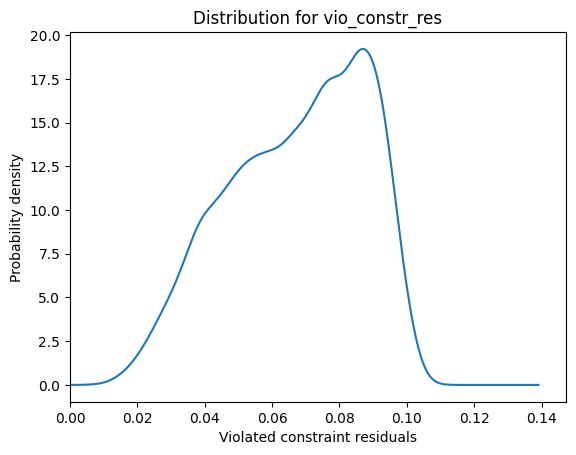

In [8]:
# Try to analyse all outputs variables: produces a linalg error
# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["vio_constr_res"])

# Get its distribution
dist = results.get_distribution(qoi="vio_constr_res")

# Locations for density function to be evaluated
# (This is taken from easyvvuq's fusion tutorial)
x = np.linspace(dist.lower[0], dist.upper[0], num=1000)
pdf = dist.pdf(x)

# Plot
ax = sns.lineplot(x=x, y=pdf, markers=True)
ax.set_title("Distribution for vio_constr_res")
ax.set_xlabel("Violated constraint residuals")
ax.set_ylabel("Probability density")
ax.set_xlim([0.0, None])

### Distribution of individual constraint violations

Text(0, 0.5, 'Probability density')

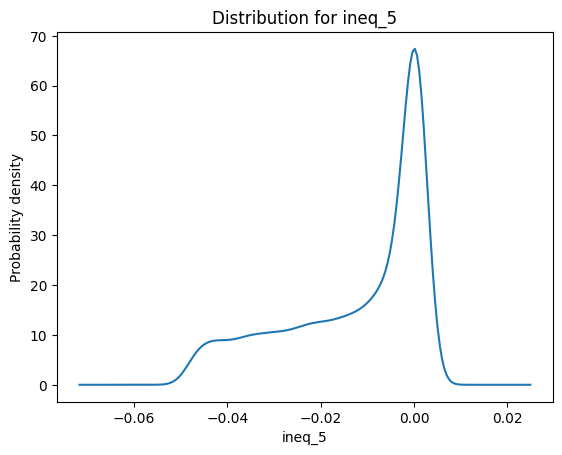

In [9]:
# Try to analyse all outputs variables: produces a linalg error
# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["ineq_5"])

# Get its distribution
dist = results.get_distribution(qoi="ineq_5")

# Locations for density function to be evaluated
# (This is taken from easyvvuq's fusion tutorial)
x = np.linspace(dist.lower[0], dist.upper[0], num=200)
pdf = dist.pdf(x)

# Plot
ax = sns.lineplot(x=x, y=pdf, markers=True)
ax.set_title("Distribution for ineq_5")
ax.set_xlabel("ineq_5")
ax.set_ylabel("Probability density")

### Objective function

Text(0, 0.5, 'Probability density')

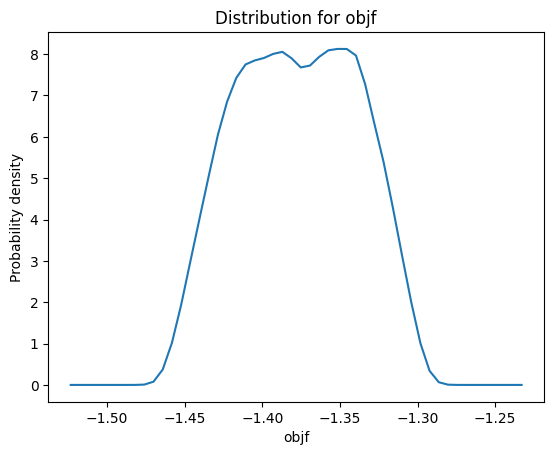

In [10]:
# Try to analyse all outputs variables: produces a linalg error
# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["objf"])

# Get its distribution
dist = results.get_distribution(qoi="objf")

# Locations for density function to be evaluated
# (This is taken from easyvvuq's fusion tutorial)
x = np.linspace(dist.lower[0], dist.upper[0])
pdf = dist.pdf(x)

# Plot
ax = sns.lineplot(x=x, y=pdf, markers=True)
ax.set_title("Distribution for objf")
ax.set_xlabel("objf")
ax.set_ylabel("Probability density")

PDF for `vio_constr_res`. Appears right from looking at the EasyVVUQ tutorial (fusion Dask).

### Sobol indices: violated constraint residuals

Sobols for violated constraint residuals.

/home/jon/anaconda3/envs/feasibility-uq/lib/python3.10/site-packages/easyvvuq/analysis/results.py:417: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


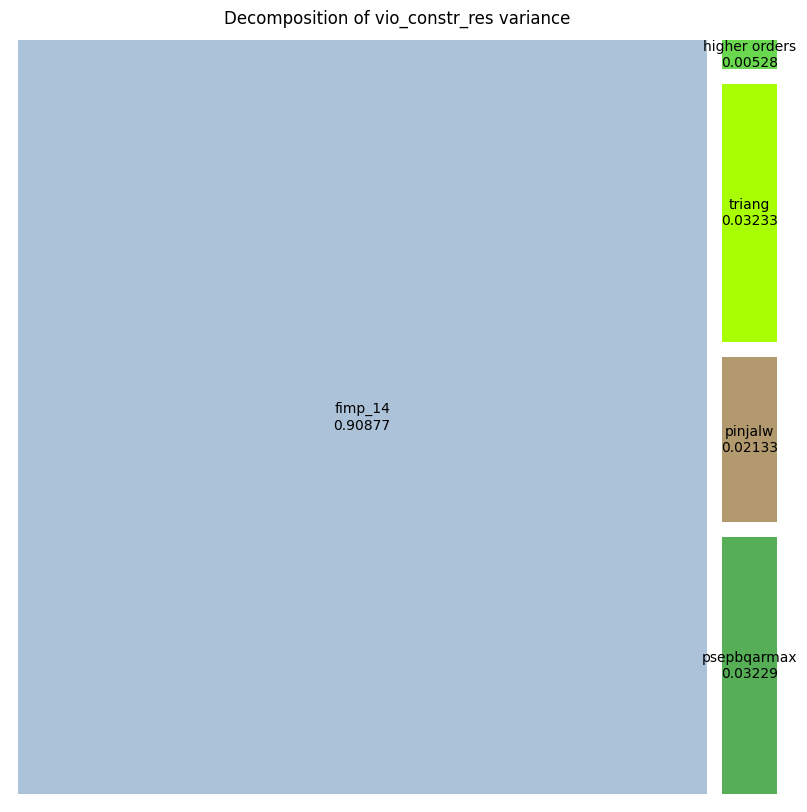

In [13]:
results = campaign.analyse(qoi_cols=["vio_constr_res"])
fig, ax = plt.subplots()
results.plot_sobols_treemap("vio_constr_res", figsize=(10, 10), ax=ax)
# ax.set_title("blah")

### Sobols for individual constraint

Interesting for discussion, but not for poster. Too much information (Sobol indices for each constraint).

/home/jon/anaconda3/envs/feasibility-uq/lib/python3.10/site-packages/easyvvuq/analysis/results.py:417: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


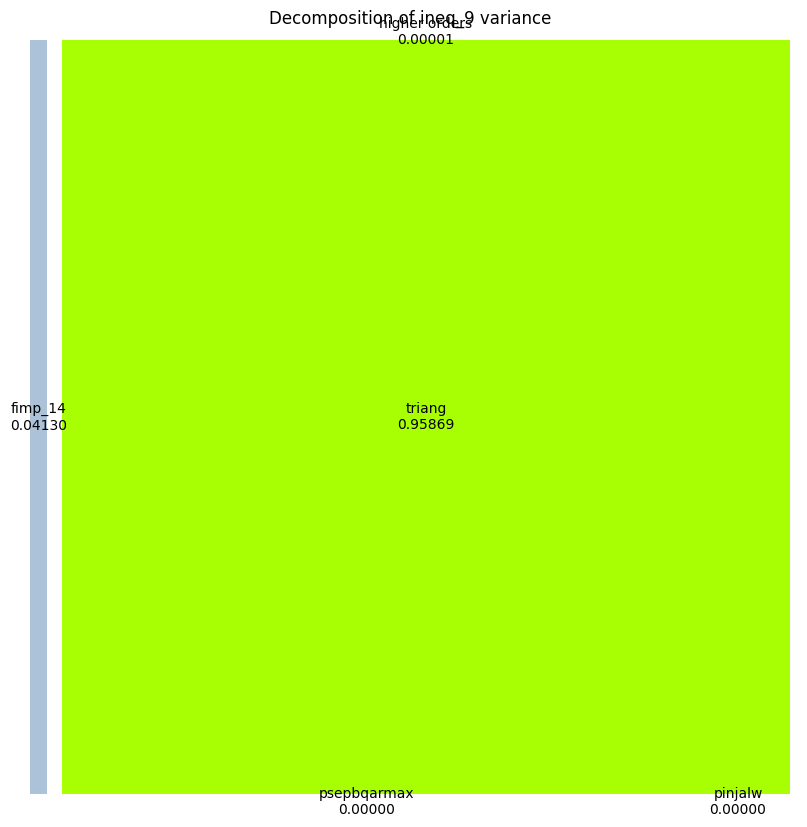

In [16]:
results = campaign.analyse(qoi_cols=["ineq_9"])
fig, ax = plt.subplots()
results.plot_sobols_treemap("ineq_9", figsize=(10, 10), ax=ax)
# ax.set_title("blah")